In [12]:
# We add all the imports
import json # Import json to handle json files.
from nltk.corpus import wordnet  #Import wordnet from the NLTK
from nltk.corpus import sentiwordnet as swn # We import sentiwordnet

In [13]:
import emoji
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from tokenize_clean_text import clean_text
import re

In [14]:
def get_hypernyms(tweet):

    new_tweet = tweet

    # We create a counter to iterate through each word
    counter = 0
    # Now we iterate through each word to get the
    for w in tweet:
        synset = wordnet.synsets(w)

        # We check the length of the synset; we continue only if we get a response from wordnet.synsets
        if len(synset) > 0:
            # We get the hypernym
            hyper = synset[0].hypernyms()
            # If we get a result
            if len(hyper) > 0:
                first_lemma = hyper[0]
                lemmas = first_lemma.lemma_names()
                new_tweet[counter] = lemmas[0]

        # We increase the counter
        counter += 1

    return new_tweet

In [15]:
def get_tweet_score(s):
    # We split the tweet by spaces to get each individual word.
    split_text_o = s.split()
    split_text_uniq = set(split_text_o)
    split_text = list(split_text_uniq)

    # We start by assigning 0 to the sentiment_score, this sentiment_score will consist of the sum of all
    # sentiment scores for each individual word.
    sentiment_score = 0  # sentiment_score

    # Here we specify the denominator that we will use to get the average
    # We will only take into account the words that have a score in wordnet.synsets
    syn_denominator = 0
    # We specify the overall score
    overall_score = 0

    # Now we replace each for in the tweet for its hypernym
    split_text = get_hypernyms(split_text)

    # Now we iterate through each word to get the
    for w in split_text:
        synset = wordnet.synsets(w)
        # We check the length of the synset; we continue only if we get a response from wordnet.synsets
        if len(synset) > 0:
            # synset[0].name() contains the id that we will use to reference the word later in senti_synset
            # We assign this value to the variable name
            name = synset[0].name()
            # Below we get the positive and negative scores for the word using its name as id
            breakdown = swn.senti_synset(name)
            # We get the negative and positive scores
            pos_score = breakdown.pos_score()
            neg_score = breakdown.neg_score()

            # Then we calculate the sentiment_score for this word and add it up to the scores of the previous words.
            sentiment_score += pos_score - neg_score  # The sentiment_score of all words in the tweet.

            # We increase the syn_denominator count + 1
            syn_denominator += 1
    # Now we will calculate the average using syn_denominator as denominator
    if syn_denominator != 0:
        # Now we calculate the average and assign it to the overall_score
        # The overall_score will be the mean of each score
        overall_score = sentiment_score / syn_denominator

    # We return the tweet's overall_score.
    return overall_score,split_text

In [16]:
# Next we iterate through all the files and assign a score
def assign_scores(files_list):
    neg=0
    pos=0
    neu=0
    for file in files_list:
        # All files are txt files.
        #f = open('Datasets/' + file + '.txt')
        f = open(file + '.txt')
        # We read the lines of the txt file.
        lines = f.readlines()

        # We create the sentences dictionary. This will contain an array of sentences which each element will contain the
        # text and an overall score for the whole sentence.
        sentences = []

        # Counter for each sentence in the corpus, this is for later comparison with the file where we extracted the data.
        count = 0

        # For each line in the file we will proceed to
        for line in lines:
            # Data Extraction
            # We parse each fine of the file.
            parsed_json = (json.loads(line))

            # Discriminate to only take english sentences
            if parsed_json['lang'] == 'en':
                # We extract the text from the parsed line
                text = parsed_json['text']
                created_at = parsed_json['created_at']

                # Now we proceed to clean the text
                cleaned_set = clean_text(text)
                after_clean_text = " ".join(cleaned_set)

                # Now we iterate and we take the hypernyms of each word
                # We get the score for each sentence
                score,hypernyms = get_tweet_score(after_clean_text)
                hypernyms = " ".join(hypernyms)
                if score > 0:
                    neg+=1
                elif score == 0:
                    neu+=1
                else:
                    pos+=1
                # Dictionary creation
                # We create a dictionary for the sentence
                sentences.append({
                    'created_at': created_at,
                    'text': text,
                    'after_clean_text': after_clean_text,
                    'hypernyms': hypernyms,
                    'score': score
                })

            # We increase the counter
            count += 1

        # We create a new file for each hash tag file that we consulted.
        with open(file + '_final_' + '.json', 'w') as outfile:
            # We finally dump the tweets + the overall_score in a json file.
            json.dump(sentences, outfile, indent=2)

        # End of the program's execution
        print("Total lines = " + str(count) + " we're processed.")
        print("Score assignation has finished successfully!")
        
        #Plot the number of positive,negative and neutral scores
        import matplotlib.pyplot as plt
        x_cord=[2,4,6]
        y_cord=[neg,neu,pos]
        tick_label=['Negative','Neutral','Positive']
        plt.bar(x_cord, y_cord, tick_label = tick_label, 
        width = 0.8, color = ['blue','orange', 'green']) 
        # naming the x-axis 
        plt.xlabel('Polarity') 
        # naming the y-axis 
        plt.ylabel('Count') 
        # plot title 
        plt.title('Representation of various Sentiments') 
  
        # function to show the plot 
        plt.show() 
        
        #Plot the dimensionality reduction
        import matplotlib.pyplot as plt
        x_cord = [3,6,9]
        y_cord = [len(text),len(after_clean_text),len(hypernyms)]
        tick_label=['Original Text','Data Cleaning','Word Embedding']
        plt.bar(x_cord, y_cord, tick_label = tick_label, 
        width = 0.8, color = ['blue','orange', 'green']) 
        # naming the x-axis 
        plt.xlabel('x-axis ') 
        # naming the y-axis 
        plt.ylabel('Dimensionality') 
        # plot title 
        plt.title('Change in Dimensionality with Functions') 
  
        # function to show the plot 
        plt.show() 

Total lines = 7385 we're processed.
Score assignation has finished successfully!


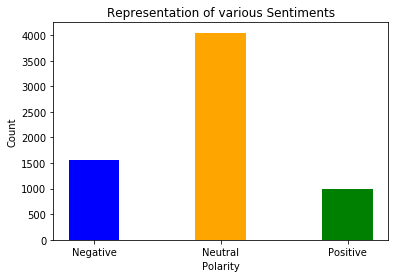

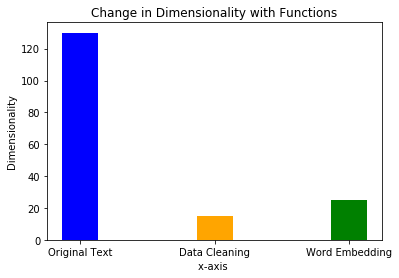

Total lines = 5802 we're processed.
Score assignation has finished successfully!


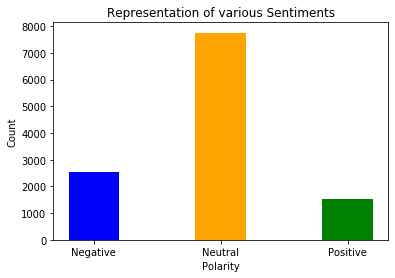

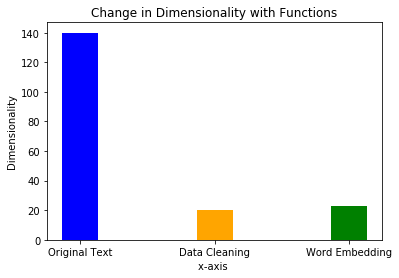

In [18]:
#files_list = ['tweets_fridaysforfuture_09-03-2020_test', 'tweets_climatechange_06-03-2020_test', 'tweets_savetheplanet_09-03-2020_test']
files_list = ['tweets_savetheplanet_09-03-2020','tweets_savetheplanet_20-04-2020']
assign_scores(files_list)

# We load the url of the first file.
url = files_list[0] + '_final_' + ".json"

# We will open the file
with open(url, 'r') as json_file:
    data = json_file.read()

# Now we parse the file
parsed = json.loads(data)

# Pretty Printing JSON string back

Total lines = 7385 we're processed.
Score assignation has finished successfully!


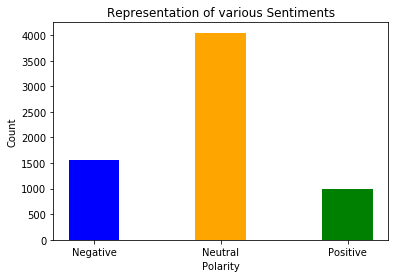

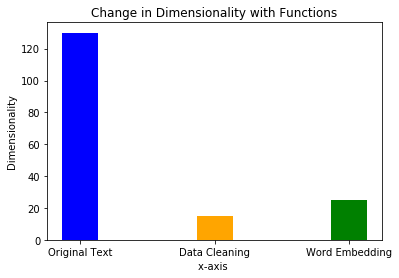

Total lines = 5802 we're processed.
Score assignation has finished successfully!


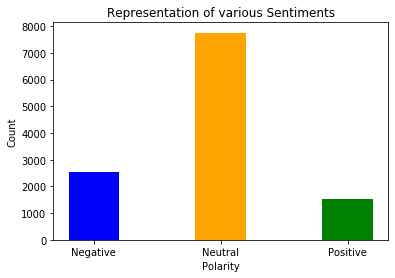

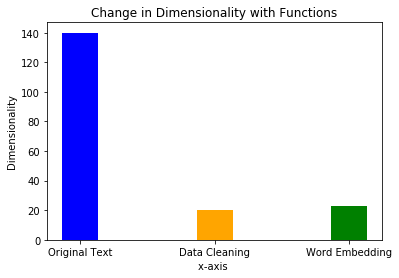

In [19]:
new_files_list = ['tweets_savetheplanet_09-03-2020','tweets_savetheplanet_20-04-2020']
assign_scores(new_files_list)

In [20]:
# We load the url of the first file.
url = new_files_list[0] + "_final_" + ".json"

# JSON file
f = open (url, "r")

# Reading from file
data = json.loads(f.read())

for i in range(4):
	print(str(data[i])+"\n")

{'created_at': 'Mon Mar 09 13:25:40 +0000 2020', 'text': 'RT @FreddyBeltranP: Good Night 🌙\n         Twitter Planet 🌐\n\n#Uyuni #Potosi #OurPlanet #Photography\n#EnssaysDiseings 🐳 #DiscoverAdventure \n#…', 'after_clean_text': 'good night crescent moon twitter planet globe meridians spouting whale', 'hypernyms': 'time_period moon degree advantage celestial_body curve pour large_person globe sound', 'score': 0.025}

{'created_at': 'Mon Mar 09 13:23:50 +0000 2020', 'text': '@priyamenon96 Great interview, though I do disagree with the use of palm oil as a primary feedstock for biodiesel.… https://t.co/iCXmk6tbDI', 'after_clean_text': 'great interview though disagree use palm oil primary feedstock biodiesel', 'hypernyms': 'lipid election activity biodiesel achiever though area raw_material disagree interrogation', 'score': 0.05555555555555555}

{'created_at': 'Mon Mar 09 13:20:29 +0000 2020', 'text': 'RT @QUBEcc: Do you spend half of your day travelling for work?\nHave you worked out how mu